<a href="https://colab.research.google.com/github/envirodatascience/final-project-justice40/blob/main/ENV617_Justice_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **Project**: Justice40 and Race: Demographics and Severity of Environmental Burden
* **Participants**: Allie Garrett and Cate York
* **Submitted**: 4/29/24

# Step 1: Define the Questions & Goals of the Project

---
* Project background
  * The purpose of the Biden administration's Justice40 initiative is to channel 40% of the overall benefits of some federal investments to “disadvantaged communities," or those "that have been historically marginalized and overburdened by pollution and underinvestment" ([E.O. 14008](https://www.whitehouse.gov/briefing-room/presidential-actions/2021/01/27/executive-order-on-tackling-the-climate-crisis-at-home-and-abroad/)).
  * The Climate and Economic Justice Screening Tool ([CEJST](https://screeningtool.geoplatform.gov/en/methodology#3/33.47/-97.5)) accounts for 8 categories of burden (with associated indicators), and is the official tool for designating which communities qualify as disadvantaged.
  * Due to legal limitations such as the [14th Amendment](https://www.archives.gov/milestone-documents/14th-amendment#:~:text=No%20State%20shall%20make%20or,equal%20protection%20of%20the%20laws.), CEJST does not explicitly account for race. However, it has been argued that the categories and their indicators implicitly include communities that have been ignored or oppressed by racist federal policies.
  * As part of the stakeholder process in developing the tool, parties such as the [EPA](https://www.epa.gov/system/files/documents/2022-08/CEJST%20Recommendations%20Letter%208_4_2022%20Final.pdf) advocated accounting for structural racism through indicators for redlining, segregation, wealth disparities, foreclosures, and tribal land, all of which are reflected in the current version of the tool.

* What questions are you trying to answer?
  * **Question 1**: Do the existing categories capture race without explicitly accounting for it?
  * **Question 2**: Which communities are experiencing the highest burden?
  * **Question 3**: Overall, is the screening tool effective given the initiative's goals?  What are the limitations of the CEJST map? What might improve it?

* Why are these important questions?
  * Federal agencies are using the CEJST to inform where investments from federal climate, clean energy, housing, and other programs flow, including billions of dollars from the [Bipartisan Infrastructure Law](https://www.whitehouse.gov/build/guidebook/#:~:text=The%20Bipartisan%20Infrastructure%20Law%20makes,%2C%20energy%2C%20and%20the%20environment.) and the [Inflation Reduction Act](https://www.whitehouse.gov/cleanenergy/inflation-reduction-act-guidebook/).
  * CEQ decided [not to include](https://www.whitehouse.gov/wp-content/uploads/2022/02/CEQ-CEJST-QandA.pdf) racial demographic data as an indicator for CEJST, while acknowledging "it is well-documented that communities of color suffer disproportionately from [environmental and climate] burdens."
  * Some researchers and advocates [have criticized](https://apnews.com/article/climate-science-environment-pollution-fe337100f1bb1f5fa86f081af8a3b69f) CEQ's decision, and there are [concerns that the tool](https://apnews.com/article/environment-climate-pollution-biden-justice40-air-633392b2f4f50bbaaff8880746783966) fails to reflect race/ethnicity as "the single most important factor determining the distribution of environmental risk in the U.S."
  * [Preliminary analysis](https://www.science.org/doi/full/10.1126/science.adg9931) modeled 3 emissions scenarios using the tool, finding the CEJST may not reduce, and may even increase, racial disparities in air pollution exposure.
  * We want to better understand the relationship between race and the CEJST variables.

# Step 2: Source Data
---
* Our data comes from the [CEJST](https://screeningtool.geoplatform.gov/en/methodology#3/33.47/-97.5) dataset compiled by the White House Council on Environmental Quality and released in November 2022 (version 1.0).
* The dataset lives on and is read in from the CEJST [downloads page](https://screeningtool.geoplatform.gov/en/downloads), which includes the [csv](https://static-data-screeningtool.geoplatform.gov/data-versions/1.0/data/score/downloadable/1.0-communities.csv) as well as the [shapefiles](https://static-data-screeningtool.geoplatform.gov/data-versions/1.0/data/score/downloadable/1.0-shapefile-codebook.zip).
* The dataset draws from (at least) 21 publicly available datasets that are either at the point-level or at the census tract level.
* According to the [Technical support document](https://static-data-screeningtool.geoplatform.gov/data-versions/1.0/data/score/downloadable/1.0-cejst-technical-support-document.pdf), communities qualify as disadvantaged if they meet any of the below criteria:
  * "if they are located in a census tract that meets the thresholds for at least one of the tool's categories of burden" AND is "at or above the threshold for an associated socioeconomic burden"
  * "if they are on land within the boundaries of Federally Recognized Tribes" or
  * if they are completely surrounded by qualifying disadvantaged tracts and are below or equal to the 50th percentile for low income
* The data set includes the information needed for our analysis:
  * **Observations**: Version 1.0 uses 2010 uses census tract boundaries for 74,134 total tracts. To fulfill the 8 burden categories, CEQ chose indicators that used a variety of statistical areas, but were able to match all indicator data to 2010 boundaries. While we use a filtered version of this data set for our analysis (as explained later), starting with all tracts accounted for allows us to pull back from just looking at the tracts that qualify as disadvantaged.
  * **Variables**: the 133 variables in the data set fall under the following categories (with indicator numbers):
    * [A] Tract information (6 variables, 1-3 and 131-133)
    * [B] Demographics (16 variables, 4-14 and 23-27)
    * [C] Disadvantaged thresholds (8 variables, 15-22)
    * [1] Climate change (17 variables, 28-44)
    * [2] Energy (6 variables, 45-50)
    * [3] Health (12 variables, 97-108)
    * [4] Housing (17 variables, 59-75)
    * [5] Legacy pollution (15 variables, 76-90)
    * [6] Transportation (8 variables, 51-58)
    * [7] Water and wastewater (6 variables, 91-96)
    * [8] Workforce development (22 variables, 109-130)
* In order to better understand the variables/indicators, we read through all of the technical support documents and created a spreadsheet with all 133 entries organized by variable name, category of burden, data source, dataset, and data years, linked [here](https://github.com/envirodatascience/final-project-justice40/blob/100791e4bf883280c398b807023fcc1d8463e3f6/CEJST_variables_explained.xlsx).
* Percentiles are recorded as integers and percentages are recorded as decimals.
* Data limitations:
  * **Geography**: Many datasets selected were not available for all U.S. territories (Puerto Rico, American Samoa, the Northern Mariana Islands, Guam, and the U.S. Virgin Islands), with CEQ specifying that datasets were used if "they were comprehensive and consistently accurate for all 50 states and D.C."
  * **Native populations**: Because the CEJST relies on census data for population and demographics, which [fails to accurately record](https://www.brookings.edu/articles/why-the-federal-government-needs-to-change-how-it-collects-data-on-native-americans/) native populations, it also uses "Land Area Representation" [data](https://www.bia.gov/bia/ots/dris/bogs) from the Dept. of Interior and Bureau of Indian Affairs. Still, this may not adequately account for native populations.
  * **Racial identity**: Racial identity is a complicated matter not perfectly encapsulated in the blunt questions of the census. Proposals for the 2030 census include combining race and ethnicity into a single question, and the 2020 census [better accounted](https://www.census.gov/library/stories/2021/08/improved-race-ethnicity-measures-reveal-united-states-population-much-more-multiracial.html) for multiracial identity, but the ACS data used for the CEJST was collected 2015-2019, before these developments.  
  * **Disadvantaged thresholds**: most of the indicators use the 90th percentile (or 65th for income) as the threshold level or "cutoff value" for whether a tract qualifies as disadvantaged. A few indicators (FUDS, abandoned mine, historic underinvestment/redlining) are marked with the boolean "yes/no" instead of percentile. We were unable to identify systematic reasoning for these threshold cutoff decisions, so the cutoff point appears somewhat randomly/normatively determined.
  * **Cumulative impacts**: Unlike CalEnviroScreen, Maryland's EJScreen Mapper, EPA's EJScreen, and HHS' Environmental Justice Index, CEJST does not include index scores that account for cumulative impacts. This limits the tool's usefulness in targeting programs according to most or more disadvantaged.
  * **Missing data**: Version 1.0 of the CEJST includes or estimates income for all census tracts with known populations. However, not all census tracts in the dataset include population information (and thus not all include income information either). In addition, some datasets that were suggested during the stakeholder feedback process were determined to be too inaccurate or inconsistent to be included; however, that also means the indicators/information that the data attempted to represent are not captured in this version of the tool. (Includes: CAFO proximity, coal ash dump sites, safe drinking water, birth outcomes, Medicaid claims, foreclosure rates, and pesticide use).

## Import modules and read in data

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from plotnine import *
import plotnine
import statsmodels.api as sm

In [2]:
df = pd.read_csv('https://static-data-screeningtool.geoplatform.gov/data-versions/1.0/data/score/downloadable/1.0-communities.csv', low_memory=False)

# Step 3a: Clean Data

---

* Orient to data
* Variable names
* Duplicates
* Data types/Casting
* Filtering/Missing values
* Clean Shapefiles

## Orient to data

In [3]:
# df.head(10)

In [4]:
# df.tail(10)

In [5]:
# check if shape is consistent with above (taken from data codebook)
# it is: 74,134 tracts/observations, 133 indicators/variables
df.shape
# we confirmed 74134 is the number of tracts defined for the 2010 census

(74134, 133)

In [6]:
# enable data table display for pandas dataframes
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [7]:
df.describe()

Census tract 2010 ID  Percent Black or African American alone  \
count          7.413400e+04                             73389.000000   
mean           2.846300e+10                                 0.134117   
std            1.655049e+10                                 0.216695   
min            1.001020e+09                                 0.000000   
25%            1.304703e+10                                 0.010000   
50%            2.804900e+10                                 0.040000   
75%            4.200347e+10                                 0.150000   
max            7.803099e+10                                 1.000000   

       Percent American Indian / Alaska Native  Percent Asian  \
count                             73302.000000   73391.000000   
mean                                  0.007097       0.045959   
std                                   0.046524       0.092308   
min                                   0.000000       0.000000   
25%                                   0.000000       0.000000   
50%                                   0.000000       0.010000   
75%                                   0.000000       0.050000   
max                                   1.000000       1.000000   

       Percent Native Hawaiian or Pacific  Percent two or more races  \
count                        73372.000000               73302.000000   
mean                             0.001816                   0.028048   
std                              0.024601                   0.032085   
min                              0.000000                   0.000000   
25%                              0.000000                   0.010000   
50%                              0.000000                   0.020000   
75%                              0.000000                   0.040000   
max                              0.980000                   0.660000   

       Percent White  Percent Hispanic or Latino  Percent other races  \
count   73390.000000                73387.000000         73382.000000   
mean        0.600003                    0.171781             0.044571   
std         0.305386                    0.231250             0.088928   
min         0.000000                    0.000000             0.000000   
25%         0.360000                    0.020000             0.000000   
50%         0.680000                    0.070000             0.010000   
75%         0.860000                    0.210000             0.050000   
max         1.000000                    1.000000             1.000000   

       Percent age under 10  ...  \
count          73273.000000  ...   
mean               0.114133  ...   
std                0.043562  ...   
min                0.000000  ...   
25%                0.090000  ...   
50%                0.110000  ...   
75%                0.140000  ...   
max                0.520000  ...   

       Percent of individuals below 200% Federal Poverty Line  \
count                                       73124.000000        
mean                                           32.677643        
std                                            18.730702        
min                                             0.000000        
25%                                            18.000000        
50%                                            30.000000        
75%                                            45.000000        
max                                           100.000000        

       Percent of individuals < 100% Federal Poverty Line (percentile)  \
count                                       73124.000000                 
mean                                           49.500725                 
std                                            28.866290                 
min                                             0.000000                 
25%                                            25.000000                 
50%                                            50.000000                 
75%                                 

## Variable names

In [8]:
# this is to make it easier to copy/paste in citing names
# df.columns.to_list()

['Census tract 2010 ID',
 'County Name',
 'State/Territory',
 'Percent Black or African American alone',
 'Percent American Indian / Alaska Native',
 'Percent Asian',
 'Percent Native Hawaiian or Pacific',
 'Percent two or more races',
 'Percent White',
 'Percent Hispanic or Latino',
 'Percent other races',
 'Percent age under 10',
 'Percent age 10 to 64',
 'Percent age over 64',
 'Total threshold criteria exceeded',
 'Total categories exceeded',
 'Identified as disadvantaged without considering neighbors',
 'Identified as disadvantaged based on neighbors and relaxed low income threshold only',
 'Identified as disadvantaged due to tribal overlap',
 'Identified as disadvantaged',
 'Percentage of tract that is disadvantaged by area',
 'Share of neighbors that are identified as disadvantaged',
 'Total population',
 'Adjusted percent of individuals below 200% Federal Poverty Line (percentile)',
 'Adjusted percent of individuals below 200% Federal Poverty Line',
 'Is low income?',
 'Income 

## Duplicates

In [9]:
# check for census tract number duplicates (none)
# no other variables where duplicate rows would be relevant for cleaning purposes
df['Census tract 2010 ID'].nunique()

74134

## Data types/Casting

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74134 entries, 0 to 74133
Columns: 133 entries, Census tract 2010 ID to Percent of the Census tract that is within Tribal areas
dtypes: bool(41), float64(80), int64(3), object(9)
memory usage: 54.9+ MB


In [11]:
# get all 133 variable names alongside data types
column_names = df.columns
data_types = df.dtypes

In [12]:
df_column_types = pd.DataFrame({'Columns': column_names, 'Types': data_types, 'Example': df.loc[0]}).reset_index()
# unclear why there's still an index column or how to remove

In [13]:
# verify data types
# df_column_types

In [14]:
# thoughts on data types:
# 'Total population' is float64, but should be int64 (can't have half a person)
# 'Percentage of tract that is disadvantaged by area' is a percentage, so seems like it should be float64, but only values appear to be 0 and 100

# Several variables seem like they should be bool, but are object - this is because there are many missing values for these variables:
# 'Identified as disadvantaged due to tribal overlap'
# 'Income data has been estimated based on geographic neighbor income'
# 'Does the tract have at least 35 acres in it?'
# 'Tract experienced historic underinvestment'
# 'Is there at least one Formerly Used Defense Site (FUDS) in the tract?'
# 'Is there at least one abandoned mine in this census tract?'

In [15]:
# recasting percentage from integer to float
df['Percentage of tract that is disadvantaged by area'] = df['Percentage of tract that is disadvantaged by area'].astype('float64')

In [16]:
# recasting population from float to integer
# first have to fix error
df['Total population'] = df['Total population'].fillna(0)
df['Total population'] = df['Total population'].astype('int64')
# revert back so missing data is properlly coded
df['Total population'] = df['Total population'].replace([0], np.nan)

In [17]:
# decided not to recast the boolean variables because of the missing values issue

## Filtering/Missing values

In [18]:
# thoughts on filtering for non-missing observations:
# there are tracts missing population data, but that still have data for other categories
# this is because the census doesn't capture all parts of the U.S. population and this data set is supplemented with DOI/BIA data
# still, for the purposes of our analysis, we want to only look at tracts that have population and demographic information

In [19]:
# filter for non-missing population data
# df[df['Total population'].isna()]
# 743 tracts missing population data (assuming above recasting was accurate)
df_dem = df[df['Total population'].notna()].copy()
# df_dem.shape
# confirmed that 73391 is the correct amount of observations that should have population data

In [20]:
# filter dataset for observations that have demographic data
columns_to_check = [
    'Percent Black or African American alone',
    'Percent American Indian / Alaska Native',
    'Percent Asian',
    'Percent Native Hawaiian or Pacific',
    'Percent two or more races',
    'Percent White',
    'Percent other races'
]
df_dem_filtered = df_dem.dropna(subset=columns_to_check, how='all').copy()

In [21]:
df_dem_filtered.shape
# 73391 is consistent with the above, so should have population and racial data for these observations

(73391, 133)

## Clean Shapefiles

In [22]:
# shapefiles
! wget https://static-data-screeningtool.geoplatform.gov/data-versions/1.0/data/score/downloadable/1.0-shapefile-codebook.zip
! unzip 1.0-shapefile-codebook.zip
! unzip usa.zip
shape = "usa.shp"

--2024-04-29 23:38:50--  https://static-data-screeningtool.geoplatform.gov/data-versions/1.0/data/score/downloadable/1.0-shapefile-codebook.zip
Resolving static-data-screeningtool.geoplatform.gov (static-data-screeningtool.geoplatform.gov)... 18.239.69.13, 18.239.69.30, 18.239.69.15, ...
Connecting to static-data-screeningtool.geoplatform.gov (static-data-screeningtool.geoplatform.gov)|18.239.69.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374181092 (357M) [binary/octet-stream]
Saving to: ‘1.0-shapefile-codebook.zip’

1.0-shapefile-codeb 100%[===================>] 356.85M  41.1MB/s    in 9.3s    

2024-04-29 23:39:00 (38.2 MB/s) - ‘1.0-shapefile-codebook.zip’ saved [374181092/374181092]

Archive:  1.0-shapefile-codebook.zip
  inflating: usa.zip                 
  inflating: 1.0-codebook.csv        
  inflating: readme-version-1.0.md   
Archive:  usa.zip
  inflating: usa.dbf                 
  inflating: columns.csv             
  inflating: usa.shx      

In [23]:
df_shape = gpd.read_file(shape)
# 7 minutes to execute

In [24]:
df_shape.head()

GEOID10       SF                CF  DF_PFS  AF_PFS  HDF_PFS  DSF_PFS  \
0  01073001100  Alabama  Jefferson County    0.96    0.85     0.72     0.84   
1  01073001400  Alabama  Jefferson County    0.98    0.83     0.92     0.93   
2  01073002000  Alabama  Jefferson County    0.98    0.97     0.94     0.76   
3  01073003802  Alabama  Jefferson County    0.95    0.91     0.62     0.79   
4  01073004000  Alabama  Jefferson County    0.99    0.96     0.96     0.86   

   EBF_PFS  EALR_PFS  EBLR_PFS  ...  AGE_10  AGE_MIDDLE  AGE_OLD  TA_COU_116  \
0     0.86      0.21      0.78  ...    0.13        0.66     0.20         NaN   
1     0.97      0.08      0.91  ...    0.08        0.72     0.18         NaN   
2     0.93      0.08      0.64  ...    0.15        0.71     0.12         NaN   
3     0.97      0.07      0.90  ...    0.14        0.72     0.13         NaN   
4     0.98       NaN      0.95  ...    0.06        0.68     0.24         NaN   

   TA_COUNT_C  TA_PERC  TA_PERC_FE  UI_EXP  THRHLD  \
0        None      NaN         NaN  Nation      21   
1        None      NaN         NaN  Nation      21   
2        None      NaN         NaN  Nation      21   
3        None      NaN         NaN  Nation      21   
4        None      NaN         NaN  Nation      21   

                                            geometry  
0  POLYGON ((-86.88244 33.55233, -86.88187 33.552...  
1  POLYGON ((-86.84088 33.52759, -86.83782 33.528...  
2  POLYGON ((-86.71390 33.53930, -86.71435 33.539...  
3  POLYGON ((-86.90317 33.47177, -86.90284 33.472...  
4  POLYGON ((-86.85463 33.48754, -86.85554 33.486...  

[5 rows x 124 columns]

In [25]:
# df_shape.tail()

In [26]:
df_shape.shape
# 74134 observations, 124 variables
# compared with 74,134 observations, 133 variables in the csv (missing 9 variables)
# this is because some variables overlap with one another (in the shapefile codebook)

(74134, 124)

In [27]:
df_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 74134 entries, 0 to 74133
Columns: 124 entries, GEOID10 to geometry
dtypes: float64(49), geometry(1), int64(65), object(9)
memory usage: 70.1+ MB


In [28]:
df_shape.describe()

DF_PFS        AF_PFS       HDF_PFS       DSF_PFS       EBF_PFS  \
count  70313.000000  70313.000000  70313.000000  73395.000000  73080.000000   
mean       0.495194      0.494884      0.494208      0.495007      0.495541   
std        0.288656      0.289009      0.288437      0.288662      0.288667   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.250000      0.240000      0.250000      0.250000      0.240000   
50%        0.500000      0.490000      0.490000      0.500000      0.490000   
75%        0.750000      0.750000      0.750000      0.745000      0.750000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           EALR_PFS      EBLR_PFS      EPLR_PFS       HBF_PFS      LLEF_PFS  \
count  49978.000000  72687.000000  72322.000000  72976.000000  67148.000000   
mean       0.495010      0.495021      0.494996      0.495007      0.494948   
std        0.288664      0.288646      0.288668      0.288662      0.288830   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.250000      0.250000      0.250000      0.250000      0.250000   
50%        0.500000      0.500000      0.500000      0.500000      0.500000   
75%        0.747500      0.745000      0.750000      0.742500      0.740000   
max        1.000000      1.000000      1.000000      0.990000      1.000000   

       ...          DM_W          DM_H          DM_O        AGE_10  \
count  ...  73390.000000  73387.000000  73382.000000  73273.000000   
mean   ...      0.600003      0.171781      0.044571      0.114133   
std    ...      0.305386      0.231250      0.088928      0.043562   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.360000      0.020000      0.000000      0.090000   
50%    ...      0.680000      0.070000      0.010000      0.110000   
75%    ...      0.860000      0.210000      0.050000      0.140000   
max    ...      1.000000      1.000000      1.000000      0.520000   

         AGE_MIDDLE       AGE_OLD  TA_COU_116      TA_PERC   TA_PERC_FE  \
count  73273.000000  73273.000000   52.000000  2156.000000  2156.000000   
mean       0.711377      0.159561    4.423077     0.426429     0.428177   
std        0.073769      0.081416    5.042355     0.470991     0.473095   
min        0.000000      0.000000    1.000000     0.000000     0.000000   
25%        0.680000      0.110000    1.000000     0.000000     0.000000   
50%        0.710000      0.150000    2.000000     0.060000     0.060000   
75%        0.750000      0.200000    7.000000     0.990000     1.000000   
max        1.000000      1.000000   25.000000     1.020000     1.000000   

             THRHLD  
count  74134.000000  
mean      20.827731  
std        1.445567  
min        3.000000  
25%       21.000000  
50%       21.000000  
75%       21.000000  
max       21.000000  

[8 rows x 114 columns]

In [29]:
df_shape['GEOID10'].nunique()
# no geoid duplicates

74134

<Axes: >

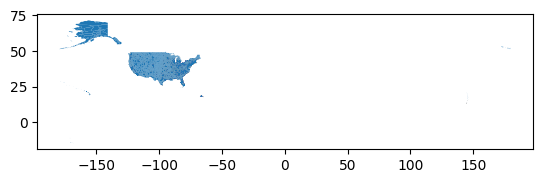

In [30]:
# quick visual
df_shape.plot()

In [31]:
# df_shape.columns.to_list()
# shapefile codebook included (columns.csv)

['GEOID10',
 'SF',
 'CF',
 'DF_PFS',
 'AF_PFS',
 'HDF_PFS',
 'DSF_PFS',
 'EBF_PFS',
 'EALR_PFS',
 'EBLR_PFS',
 'EPLR_PFS',
 'HBF_PFS',
 'LLEF_PFS',
 'LIF_PFS',
 'LMI_PFS',
 'PM25F_PFS',
 'HSEF',
 'P100_PFS',
 'P200_I_PFS',
 'AJDLI_ET',
 'LPF_PFS',
 'KP_PFS',
 'NPL_PFS',
 'RMP_PFS',
 'TSDF_PFS',
 'TPF',
 'TF_PFS',
 'UF_PFS',
 'WF_PFS',
 'UST_PFS',
 'N_WTR',
 'N_WKFC',
 'N_CLT',
 'N_ENY',
 'N_TRN',
 'N_HSG',
 'N_PLN',
 'N_HLTH',
 'SN_C',
 'SN_T',
 'DLI',
 'ALI',
 'PLHSE',
 'LMILHSE',
 'ULHSE',
 'EPL_ET',
 'EAL_ET',
 'EBL_ET',
 'EB_ET',
 'PM25_ET',
 'DS_ET',
 'TP_ET',
 'LPP_ET',
 'HRS_ET',
 'KP_ET',
 'HB_ET',
 'RMP_ET',
 'NPL_ET',
 'TSDF_ET',
 'WD_ET',
 'UST_ET',
 'DB_ET',
 'A_ET',
 'HD_ET',
 'LLE_ET',
 'UN_ET',
 'LISO_ET',
 'POV_ET',
 'LMI_ET',
 'IA_LMI_ET',
 'IA_UN_ET',
 'IA_POV_ET',
 'TC',
 'CC',
 'IAULHSE',
 'IAPLHSE',
 'IALMILHSE',
 'IALMIL_76',
 'IAPLHS_77',
 'IAULHS_78',
 'LHE',
 'IALHE',
 'IAHSEF',
 'N_CLT_EOMI',
 'N_ENY_EOMI',
 'N_TRN_EOMI',
 'N_HSG_EOMI',
 'N_PLN_EOMI',
 'N_WTR_

In [32]:
# drop tracts without population data
df_shape_dem = df_shape[df_shape['TPF'].notna()]
# 74094 is not 73391
# we weren't able to determine why observations from shape file didn't equal the observations from the dataset

# Step 3b: Analyze Data & Step 4: Visualization

---

* Question 1: Do the existing categories capture race without explicitly accounting for it?
* Question 2: Which communities are experiencing the highest burden?

## Question 1

---
* **Question 1**: Do the existing categories capture race without explicitly accounting for it?
  * Part A: Building a model to predict whether a census tract is burdened
  * Part B: Line of best fit comparing tract percentage of people of color with the number of categories
  * Part C: Correlation matrix to see which variables are correlated with race



In [33]:
 # first, curious about numbers for where "majority white" and "majority black" tracts qualify or fail to qualify
 # recall outcomes for disadvantaged variable
 df_dem['Identified as disadvantaged'].unique()

array([False,  True])

In [34]:
# create a majority black boolean
df_dem['Majority black'] = np.where((df_dem['Percent Black or African American alone'] > 0.5), 1, 0)
# note that because of structural issues with the census, this doesn't adequately account for mixed race

In [35]:
# majority black that qualify
# df_dem[(df_dem['Majority black'] == 1) & (df_dem['Identified as disadvantaged'] == True)]
# 4,711 total

In [36]:
# majority black that do not qualify
# df_dem[(df_dem['Majority black'] == 1) & (df_dem['Identified as disadvantaged'] == False)]
# 1,379 total

In [37]:
# create a majority white boolean
df_dem['Majority white'] = np.where((df_dem['Percent White'] > 0.5), 1, 0)

In [38]:
# majority white that do qualify
# df_dem[(df_dem['Majority white'] == 1) & (df_dem['Identified as disadvantaged'] == True)]
# 10,919 total

In [39]:
# majority white that do not qualify
# df_dem[(df_dem['Majority white'] == 1) & (df_dem['Identified as disadvantaged'] == False)]
# 37,604 total

In [40]:
# create a person of color percentage variable
# note: this does not account for white "Percent Hispanic or Latino", which is considered an ethnicity category on the census
# unfortunately, we weren't able to find IPUMS data by tract that preserves the "white, not hispanic or latino" category of the census
# it was too cumbersome to get the accurate census data.
# still, we performed the analysis on the percentages in the CEJST dataset, recognizing the limitations of our analysis.
df_dem['perc_poc'] = 1 - df_dem['Percent White']
print(df_dem.perc_poc)

0        0.17
1        0.62
2        0.35
3        0.11
4        0.30
         ... 
74128    0.89
74129    0.86
74130    0.93
74131    0.95
74132    0.96
Name: perc_poc, Length: 73391, dtype: float64


In [44]:
# Part A: model to predict whether a census tract is burdened depending on demographics
# define inital model with all variables of interest
# drop missing values from explanatory demographic variables
df_dem_model = df_dem.dropna(subset=['Percent Black or African American alone',
                                     'Percent American Indian / Alaska Native',
                                     'Percent Asian',
                                     'Percent Native Hawaiian or Pacific',
                                     'Percent two or more races',
                                     'Percent White',
                                     'Percent other races'])

In [45]:
df_dem_model.shape
# 73283 observations (down from 73391)

(73283, 138)

In [42]:
# create a binary variable for disadvantaged status
df_dem['disadvantaged'] = np.where((df_dem['Identified as disadvantaged'] == True), 1, 0)

In [46]:
y = df_dem_model['disadvantaged']
x = df_dem_model['perc_poc']
model1=sm.Logit(y,x)
# logistic regression (binary dependent variable)

In [47]:
# fit model
model_result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.691067
         Iterations 4


In [48]:
 # print results
print(model_result1.summary2())
# not a helpful model for our purposes given R-squared

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: disadvantaged    Pseudo R-squared: -0.048     
Date:               2024-04-29 23:46 AIC:              101288.9102
No. Observations:   73283            BIC:              101298.1123
Df Model:           0                Log-Likelihood:   -50643.    
Df Residuals:       73282            LL-Null:          -48326.    
Converged:          1.0000           LLR p-value:      nan        
No. Iterations:     4.0000           Scale:            1.0000     
--------------------------------------------------------------------
              Coef.    Std.Err.      z      P>|z|    [0.025   0.975]
--------------------------------------------------------------------
perc_poc      0.2575     0.0148   17.4159   0.0000   0.2285   0.2864



In [49]:
y = df_dem_model['disadvantaged']
x = (df_dem_model[['Percent White','Percent Black or African American alone', 'Percent American Indian / Alaska Native', 'Percent Asian','Percent Native Hawaiian or Pacific', 'Percent two or more races']])
model2=sm.Logit(y,x)
# not including 'Percent other races'

In [50]:
# fit model
model_result2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.544838
         Iterations 7


In [51]:
# print results
print(model_result2.summary2())
# again, race does seem to be implicated in disadvantaged status, but it's unclear how

                                     Results: Logit
Model:                      Logit                    Method:                   MLE       
Dependent Variable:         disadvantaged            Pseudo R-squared:         0.174     
Date:                       2024-04-29 23:46         AIC:                      79866.7059
No. Observations:           73283                    BIC:                      79921.9184
Df Model:                   5                        Log-Likelihood:           -39927.   
Df Residuals:               73277                    LL-Null:                  -48326.   
Converged:                  1.0000                   LLR p-value:              0.0000    
No. Iterations:             7.0000                   Scale:                    1.0000    
-----------------------------------------------------------------------------------------
                                         Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


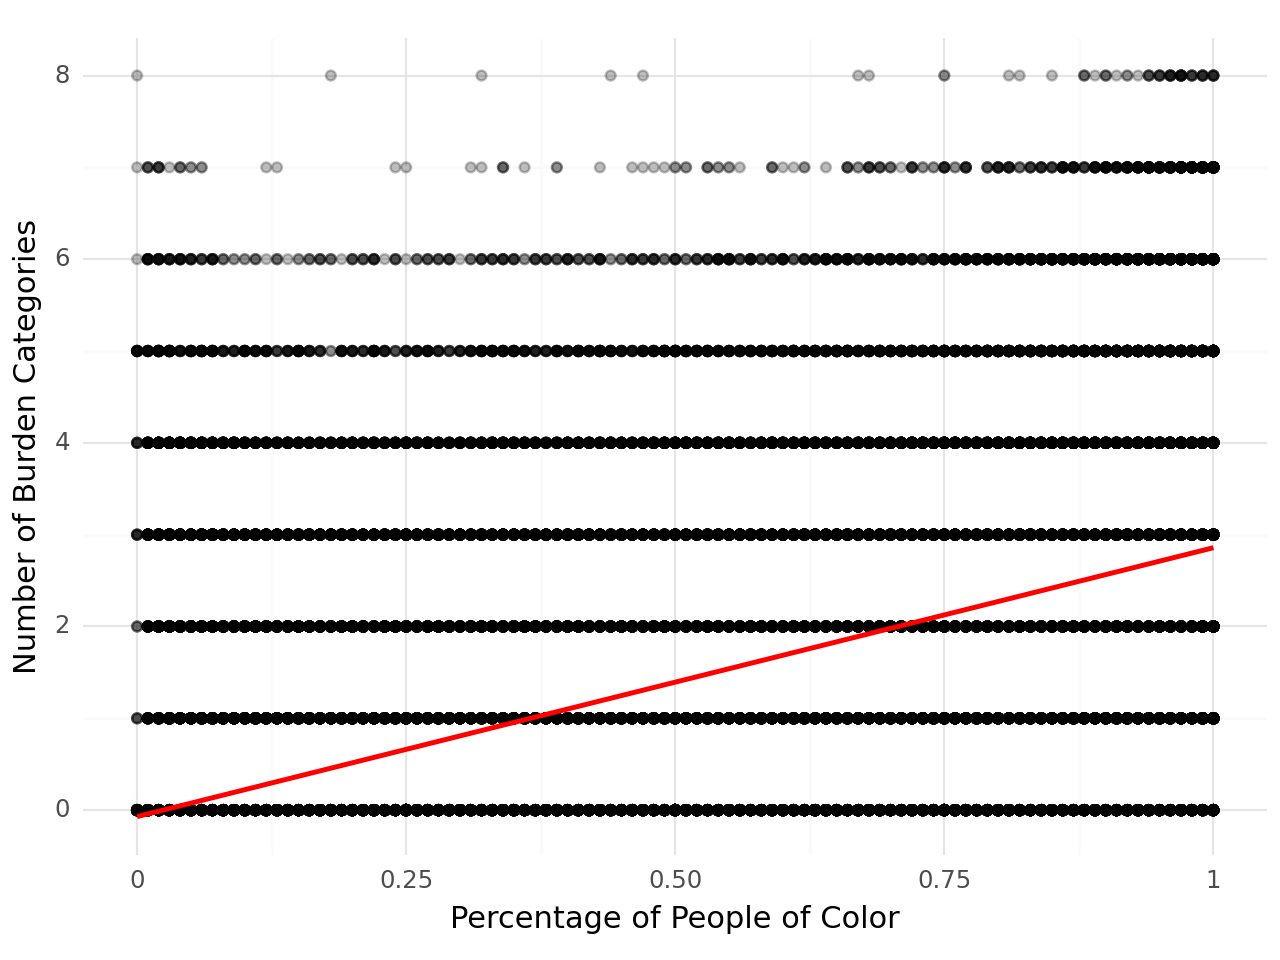

<Figure Size: (640 x 480)>

In [52]:
# Part B: line of best fit comparing tract percentage of people of color with the number of categories
# observe relationship between number of burden categories and percentage of people of color
(
    ggplot(df_dem, aes(x='perc_poc', y='Total categories exceeded')) +
    geom_point(alpha=0.25) +
    geom_smooth(method='lm', color='red') +
    xlab('Percentage of People of Color') +
    ylab('Number of Burden Categories') +
    theme_minimal()
)
# not a good visual, will revisit later in Question 2 analysis

In [53]:
# Part C: Correlation matrix to see which variables are correlated with race
# create a dummy variable for the percent poc variable if it's above 50%
df_dem['maj_poc'] = np.where((df_dem['perc_poc'] >0.5), 1, 0)

In [54]:
# using just the boolean variables for each indicator (must account for burden and income)
df_corr_poc = df_dem[['perc_poc',
                      'Greater than or equal to the 90th percentile for expected agriculture loss rate and is low income?',
                      'Greater than or equal to the 90th percentile for expected building loss rate and is low income?',
                      'Greater than or equal to the 90th percentile for expected population loss rate and is low income?',
                      'Greater than or equal to the 90th percentile for share of properties at risk of flood in 30 years and is low income?',
                      'Greater than or equal to the 90th percentile for share of properties at risk of fire in 30 years and is low income?',
                      'Greater than or equal to the 90th percentile for energy burden and is low income?',
                      'Greater than or equal to the 90th percentile for PM2.5 exposure and is low income?',
                      'Greater than or equal to the 90th percentile for diesel particulate matter and is low income?',
                      'Greater than or equal to the 90th percentile for traffic proximity and is low income?',
                      'Greater than or equal to the 90th percentile for DOT transit barriers and is low income?',
                      'Greater than or equal to the 90th percentile for housing burden and is low income?',
                      'Greater than or equal to the 90th percentile for lead paint, the median house value is less than 90th percentile and is low income?',
                      "Greater than or equal to the 90th percentile for share of the tract's land area that is covered by impervious surface or cropland as a percent and is low income?",
                      'Tract experienced historic underinvestment and remains low income',
                      'Greater than or equal to the 90th percentile for proximity to hazardous waste facilities and is low income?',
                      'Greater than or equal to the 90th percentile for proximity to superfund sites and is low income?',
                      'Greater than or equal to the 90th percentile for proximity to RMP sites and is low income?',
                      'There is at least one abandoned mine in this census tract and the tract is low income.',
                      'There is at least one Formerly Used Defense Site (FUDS) in the tract and the tract is low income.',
                      'Greater than or equal to the 90th percentile for wastewater discharge and is low income?',
                      'Greater than or equal to the 90th percentile for leaky underground storage tanks and is low income?',
                      'Greater than or equal to the 90th percentile for asthma and is low income?',
                      'Greater than or equal to the 90th percentile for diabetes and is low income?',
                      'Greater than or equal to the 90th percentile for heart disease and is low income?',
                      'Greater than or equal to the 90th percentile for low life expectancy and is low income?',
                      'Greater than or equal to the 90th percentile for low median household income as a percent of area median income and has low HS attainment?',
                      'Greater than or equal to the 90th percentile for households at or below 100% federal poverty level and has low HS attainment?'
                      ]]

In [55]:
df_corr_test1 = df_corr_poc.corr()

In [56]:
df_corr_test1.style.background_gradient(axis=None, cmap='coolwarm')

In [57]:
# try again with the dummy variable previously created for "majority black" tracts
df_corr_black = df_dem[['Percent Black or African American alone',
                      'Greater than or equal to the 90th percentile for expected agriculture loss rate and is low income?',
                      'Greater than or equal to the 90th percentile for expected building loss rate and is low income?',
                      'Greater than or equal to the 90th percentile for expected population loss rate and is low income?',
                      'Greater than or equal to the 90th percentile for share of properties at risk of flood in 30 years and is low income?',
                      'Greater than or equal to the 90th percentile for share of properties at risk of fire in 30 years and is low income?',
                      'Greater than or equal to the 90th percentile for energy burden and is low income?',
                      'Greater than or equal to the 90th percentile for PM2.5 exposure and is low income?',
                      'Greater than or equal to the 90th percentile for diesel particulate matter and is low income?',
                      'Greater than or equal to the 90th percentile for traffic proximity and is low income?',
                      'Greater than or equal to the 90th percentile for DOT transit barriers and is low income?',
                      'Greater than or equal to the 90th percentile for housing burden and is low income?',
                      'Greater than or equal to the 90th percentile for lead paint, the median house value is less than 90th percentile and is low income?',
                      "Greater than or equal to the 90th percentile for share of the tract's land area that is covered by impervious surface or cropland as a percent and is low income?",
                      'Tract experienced historic underinvestment and remains low income',
                      'Greater than or equal to the 90th percentile for proximity to hazardous waste facilities and is low income?',
                      'Greater than or equal to the 90th percentile for proximity to superfund sites and is low income?',
                      'Greater than or equal to the 90th percentile for proximity to RMP sites and is low income?',
                      'There is at least one abandoned mine in this census tract and the tract is low income.',
                      'There is at least one Formerly Used Defense Site (FUDS) in the tract and the tract is low income.',
                      'Greater than or equal to the 90th percentile for wastewater discharge and is low income?',
                      'Greater than or equal to the 90th percentile for leaky underground storage tanks and is low income?',
                      'Greater than or equal to the 90th percentile for asthma and is low income?',
                      'Greater than or equal to the 90th percentile for diabetes and is low income?',
                      'Greater than or equal to the 90th percentile for heart disease and is low income?',
                      'Greater than or equal to the 90th percentile for low life expectancy and is low income?',
                      'Greater than or equal to the 90th percentile for low median household income as a percent of area median income and has low HS attainment?',
                      'Greater than or equal to the 90th percentile for households at or below 100% federal poverty level and has low HS attainment?'
                      ]]

In [58]:
df_corr_test2 = df_corr_black.corr()

In [59]:
df_corr_test2.style.background_gradient(axis=None, cmap='coolwarm')

## Question 2

---
**Question 2**: Which communities are experiencing the highest burden?
* Part A: Categories of Burden
  * Create a chloropleth map to understand which communities are experiencing the highest levels of burden, as defined by CEJST's 8 categories


* Part B: Creating a Burden Index
  * CEQ readily acknowledges the limitations of the CEJST in assessing cumulative environmental burden, citing, among other examples, CalEnviroScreen as a tool that does examine, to use [CalEPA's 2005 definition](https://oehha.ca.gov/media/downloads/calenviroscreen/report/calenviroscreen40reportf2021.pdf) of cumulative impacts: "exposures, public health or environmental effects from the combined emissions and discharges, in a geographic area, including environmental pollution from all sources, whether single or multi-media, routinely, accidentally, or otherwise released. Impacts will take into account sensitive populations and socioeconomic factors, where applicable and to the extent data are available."
  * The CEJST does not have a codified definition of cumulative impact; however, the [CalEnviroScreen](https://oehha.ca.gov/calenviroscreen/about-calenviroscreen#:~:text=%E2%80%9CCumulative%20impacts%E2%80%9D%20means%20exposures%20and,pollution%20in%20a%20geographic%20area.) 4.0 guidelines provide a model for how to treat environmental burden indicators:
    * Average of Exposures and Environmental Effects x Average of Sensitive Popluations and Socioeconomic Factors = CalEnviroScreen Score
    * The Environmental Effects score (presence of pollutants) is weighted half as much as the Exposures score (exposure to pollutants)
  * CEJST has different numbers of indicators according to burden category:
    * [1] Climate change (17 variables, 28-44, 5 indicators)
    * [2] Energy (6 variables, 45-50, 2 indicators)
    * [3] Health (12 variables, 97-108, 4 indicators)
    * [4] Housing (17 variables, 59-75, 5 indicators)
    * [5] Legacy pollution (15 variables, 76-90, 5 indicators)
    * [6] Transportation (8 variables, 51-58, 3 indicators)
    * [7] Water and wastewater (6 variables, 91-96, 2 indicators)
    * [8] Workforce development (22 variables, 109-130, 6 indicators)
  * Most indicators already include a percentile variable, so we don't have to normalize
  * **To be clear**, we're looking at cumulative impacts in terms of compounding types of burden, not accumulated impacts over time.


In [60]:
# Question 2 Part A: chloropleth map that shows geographic areas from "least categories" to "most categories"
# check how state names appear
df_shape['SF'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'American Samoa', 'Guam', 'Northern Mariana Islands',
       'Virgin Islands'], dtype=object)

In [61]:
# look at only contiguous US for better visualization purposes
df_shape_cont = df_shape_dem[
    (df_shape_dem['SF'] != 'Hawaii') &
     (df_shape_dem['SF'] != 'Alaska') &
      (df_shape_dem['SF'] != 'Puerto Rico') &
       (df_shape_dem['SF'] != 'American Samoa') &
        (df_shape_dem['SF'] != 'Guam') &
         (df_shape_dem['SF'] != 'Northern Mariana Islands') &
          (df_shape_dem['SF'] != 'Virgin Islands')].copy()

In [62]:
df_shape_cont['SF'].nunique()
# ? states represented

49

In [63]:
# count total tracts with at least 1 burden
df_shape_cont[df_shape_cont['CC'] > 0]['CC'].count()
# ? tracts that have at least 1 burden category

25714

In [64]:
# drop NA values for better map visuals
# df_shape_map = df_shape_cont[df_shape_cont['CC'] >0]
# ?

In [65]:
# drop irrelevant columns
df_shape_map = df_shape_cont[['GEOID10','SF', 'CF', 'CC', 'SN_C', 'geometry']]

In [66]:
# check columns in modified data frame
df_shape_map.columns

Index(['GEOID10', 'SF', 'CF', 'CC', 'SN_C', 'geometry'], dtype='object')

In [67]:
df_shape_map.shape
# 26581 observations instead of 26672

(72514, 6)

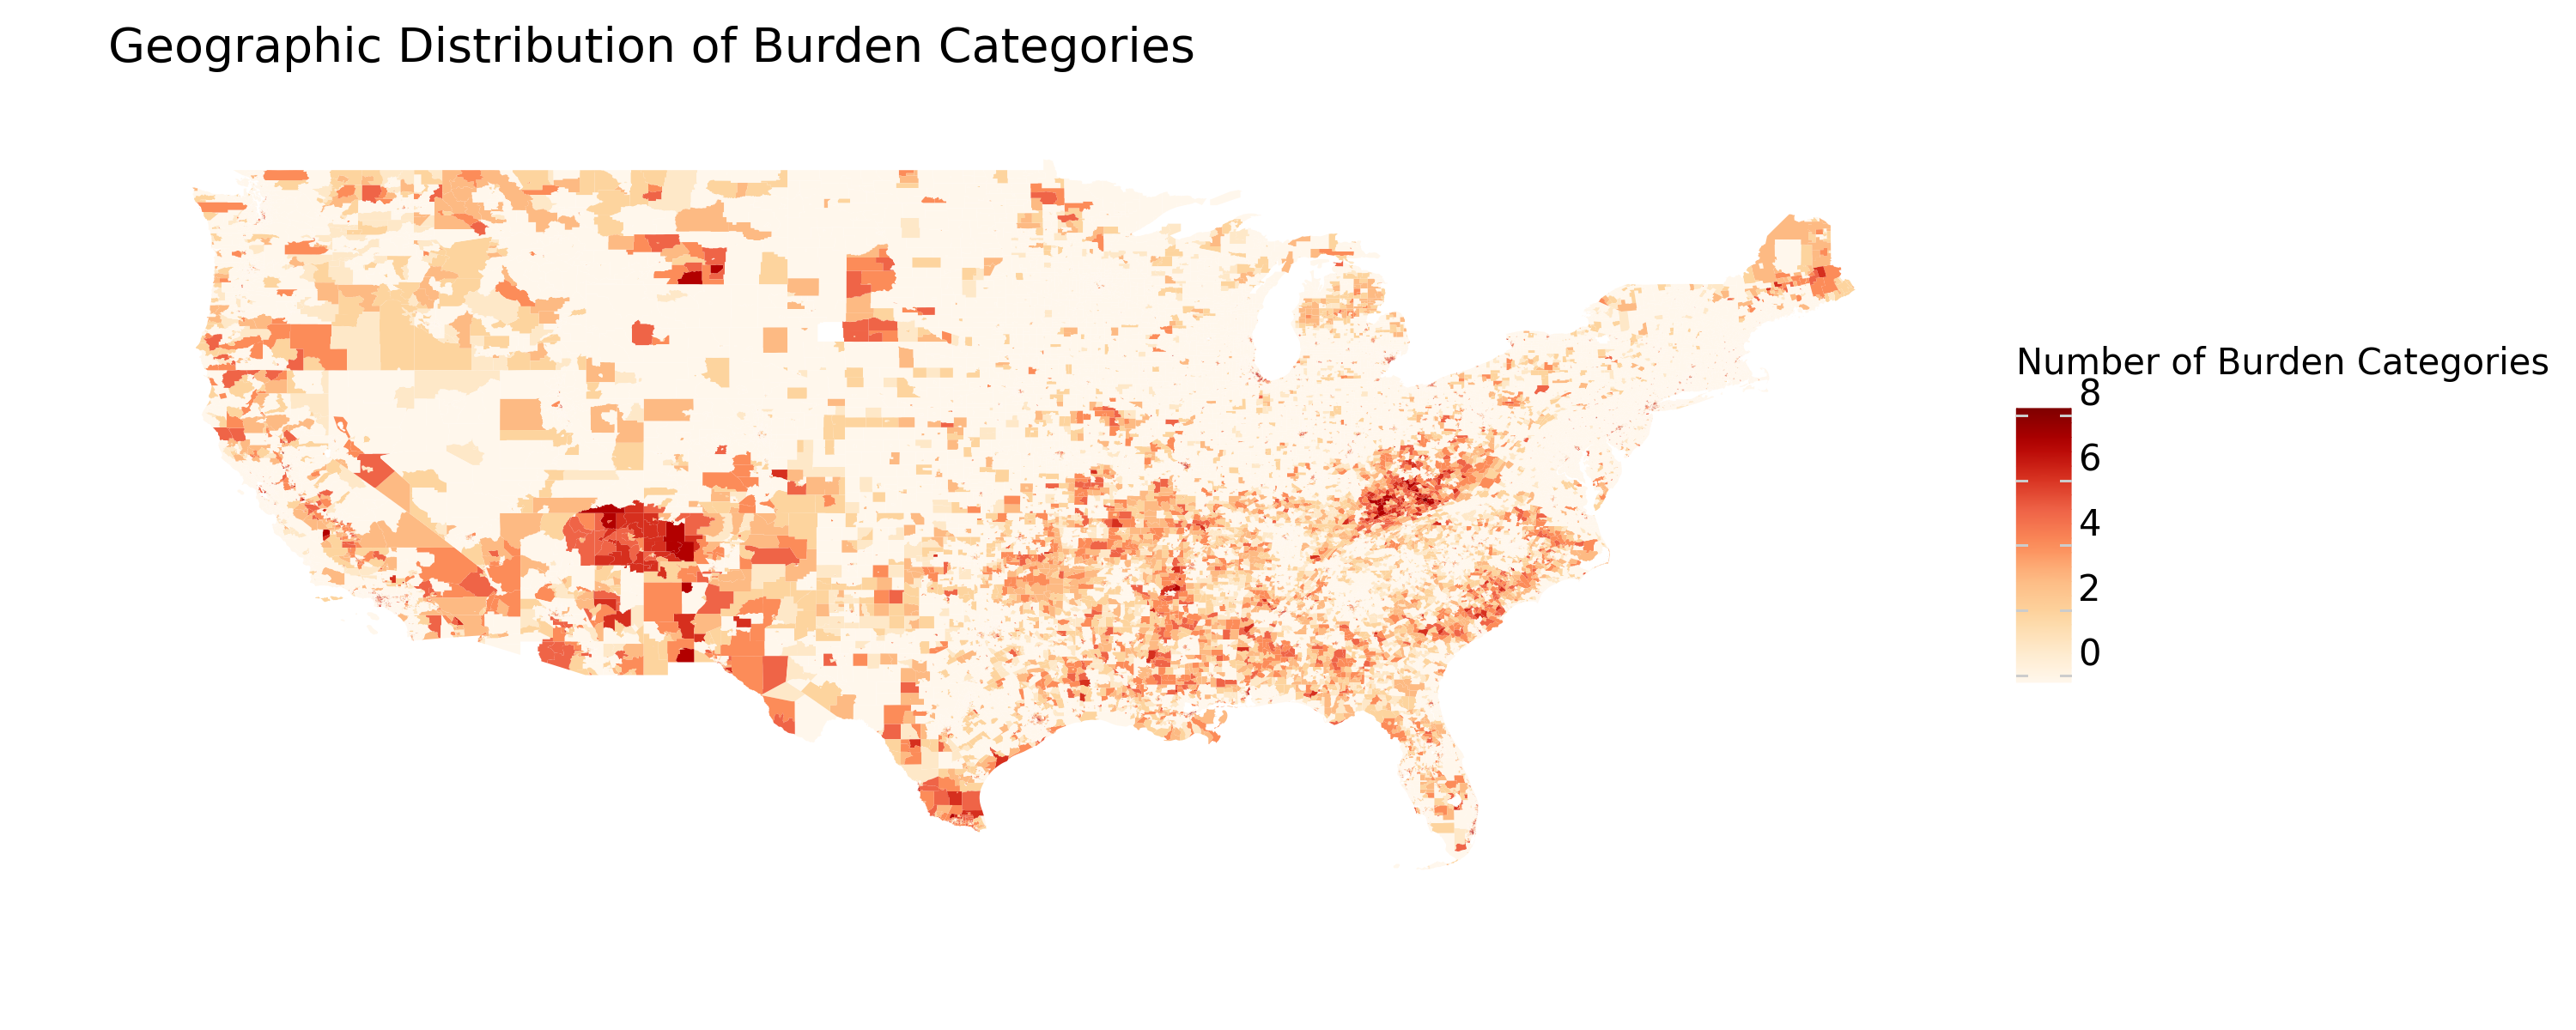

<Figure Size: (1500 x 600)>

In [68]:
plotnine.options.figure_size = (15,6)
(
    ggplot() +
    geom_map(df_shape_map, aes(geometry='geometry', fill='CC'), color=None, linetype='solid', size=0.2) +
    scale_fill_cmap(cmap_name='OrRd') +
    labs(fill='Number of Burden Categories', title='Geographic Distribution of Burden Categories') +
    theme_classic() +
    theme(
        axis_line=element_line(color="white"),
        axis_ticks=element_line(color="white"),
        axis_text=element_text(color="white", size=15),
        text=element_text(size=15),
        plot_title=element_text(size=20)
    ) +
    xlab("") +
    ylab("")
)

In [69]:
# closer look at areas with highest number of categories
df_shape_map_high = df_shape_map[(df_shape_map['CC'] == 8)]

In [70]:
df_shape_map_high['SF'].unique()

array(['Alabama', 'California', 'Colorado', 'Connecticut', 'Florida',
       'Illinois', 'Louisiana', 'Massachusetts', 'Michigan', 'Missouri',
       'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Pennsylvania',
       'South Carolina', 'Texas', 'West Virginia'], dtype=object)

In [71]:
df_shape_map_high.groupby(['SF']).agg(n_counties=('GEOID10','nunique'))

n_counties
SF                        
Alabama                  2
California               7
Colorado                 1
Connecticut              1
Florida                  6
Illinois                14
Louisiana               10
Massachusetts            1
Michigan                 4
Missouri                 2
New Jersey               2
New York                 2
North Carolina           2
Ohio                     3
Pennsylvania             4
South Carolina           1
Texas                    1
West Virginia            2

In [73]:
# could make the map more helpful visually by averaging burden level by county (groupby ag)
# that would require county shapefiles (from 2010 census) which we would merge with the county id
# unfortunately this was too cumbersome for our purposes for this class

In [75]:
# Part B: replicate CalEnviroScreen methodology by aligning CEJST indicators with CES categories
# exposure indicators:
# 'PM2.5 in the air (percentile)'
# 'Diesel particulate matter exposure (percentile)'
# 'Traffic proximity and volume (percentile)'
# 'Percent pre-1960s housing (lead paint indicator) (percentile)'
# 'Share of homes with no kitchen or indoor plumbing (percentile)'

# environmental effects indicators:
# 'Expected agricultural loss rate (Natural Hazards Risk Index) (percentile)'
# 'Expected building loss rate (Natural Hazards Risk Index) (percentile)'
# 'Expected population loss rate (Natural Hazards Risk Index) (percentile)'
# 'Share of properties at risk of flood in 30 years (percentile)'
# 'Share of properties at risk of fire in 30 years (percentile)'
# "Share of the tract's land area that is covered by impervious surface or cropland as a percent (percentile)"
# 'Proximity to hazardous waste sites (percentile)'
# 'Proximity to NPL (Superfund) sites (percentile)'
# 'Proximity to Risk Management Plan (RMP) facilities (percentile)'
# 'Wastewater discharge (percentile)'
# 'Leaky underground storage tanks (percentile)'

# sensitive populations indicators:
# 'Current asthma among adults aged greater than or equal to 18 years (percentile)'
# 'Diagnosed diabetes among adults aged greater than or equal to 18 years (percentile)'
# 'Coronary heart disease among adults aged greater than or equal to 18 years (percentile)'
# 'Low life expectancy (percentile)'

# socioeconomic factors indicators:
# 'Energy burden (percentile)'
# 'DOT Travel Barriers Score (percentile)'
# 'Housing burden (percent) (percentile)'
# 'Median value ($) of owner-occupied housing units (percentile)'
# 'Low median household income as a percent of area median income (percentile)'
# 'Linguistic isolation (percent) (percentile)'
# 'Unemployment (percent) (percentile)'
# 'Percent of individuals below 200% Federal Poverty Line (percentile)'
# 'Percent of individuals < 100% Federal Poverty Line (percentile)'
# Percent individuals age 25 or over with less than high school degree (percentile)'

# indicators not included:
# this was either because it was too cumbersome to work out the percentiles or because the data didn't make sense for the index
# for example, 'Median value ($) of owner-occupied housing units (percentile)' wouldn't average in the same way to measure burden
# 'Tract experienced historic underinvestment and remains low income'
# 'Tract experienced historic underinvestment'
# 'Is there at least one Formerly Used Defense Site (FUDS) in the tract?'
# 'Is there at least one abandoned mine in this census tract?'
# 'Percent individuals age 25 or over with less than high school degree'
# 'Percent of residents who are not currently enrolled in higher ed'
# 'Unemployment (percent) in 2009 (island areas) and 2010 (states and PR)'
# 'Percentage households below 100% of federal poverty line in 2009 (island areas) and 2010 (states and PR)'
# 'Greater than or equal to the 90th percentile for unemployment and has low HS education in 2009 (island areas)?'
# 'Percent of the Census tract that is within Tribal areas'
# 'Median value ($) of owner-occupied housing units (percentile)'

In [76]:
# Step 1: calculate exposure average
df_dem['exposure_avg'] = df_dem[[
    'PM2.5 in the air (percentile)',
    'Diesel particulate matter exposure (percentile)',
    'Traffic proximity and volume (percentile)',
    'Percent pre-1960s housing (lead paint indicator) (percentile)',
    'Share of homes with no kitchen or indoor plumbing (percentile)']].mean(axis=1)

In [77]:
# replicate for shapefile
df_shape_cont['exposure_avg'] = df_shape_cont[[
    'PM25F_PFS',
    'DSF_PFS',
    'TF_PFS',
    'LPF_PFS',
    'KP_PFS']].mean(axis=1).copy()

In [78]:
# Step 2: calculate environmental effects average
df_dem['enviro_avg'] = df_dem[[
    'Expected agricultural loss rate (Natural Hazards Risk Index) (percentile)',
    'Expected building loss rate (Natural Hazards Risk Index) (percentile)',
    'Expected population loss rate (Natural Hazards Risk Index) (percentile)',
    'Share of properties at risk of flood in 30 years (percentile)',
    'Share of properties at risk of fire in 30 years (percentile)',
    "Share of the tract's land area that is covered by impervious surface or cropland as a percent (percentile)",
    'Proximity to hazardous waste sites (percentile)',
    'Proximity to NPL (Superfund) sites (percentile)',
    'Proximity to Risk Management Plan (RMP) facilities (percentile)',
    'Wastewater discharge (percentile)',
    'Leaky underground storage tanks (percentile)']].mean(axis=1)

In [79]:
# replicate for shapefile
df_shape_cont['enviro_avg'] = df_shape_cont[[
    'EALR_PFS',
    'EBLR_PFS',
    'EPLR_PFS',
    'FLD_PFS',
    'WFR_PFS',
    'IS_PFS',
    'TSDF_PFS',
    'NPL_PFS',
    'RMP_PFS',
    'WF_PFS',
    'UST_PFS']].mean(axis=1)

In [80]:
# Step 3: weight environmental effects by 0.5
df_dem['enviro_avg_half'] = df_dem['enviro_avg']*0.5

In [81]:
# replicate for shapefile
df_shape_cont['enviro_avg_half'] = df_shape_cont['enviro_avg']*0.5

In [82]:
# Step 4: combine exposures and environmental effects
# how to do this? from CalEnviroScreen: "When combining the Exposures and Environmental Effects components,
# the Environmental Effects score was weighted half as much as the Exposures score."
df_dem['pollution_burden'] = df_dem['exposure_avg'] + df_dem['enviro_avg_half']

In [83]:
# replicate for shapefile
df_shape_cont['pollution_burden'] = df_shape_cont['exposure_avg'] + df_shape_cont['enviro_avg_half']

In [84]:
# Step 5: calculate population characteristics average
df_dem['pop_avg'] = df_dem[[
    'Current asthma among adults aged greater than or equal to 18 years (percentile)',
    'Diagnosed diabetes among adults aged greater than or equal to 18 years (percentile)',
    'Coronary heart disease among adults aged greater than or equal to 18 years (percentile)',
    'Low life expectancy (percentile)',
    'Energy burden (percentile)',
    'DOT Travel Barriers Score (percentile)',
    'Housing burden (percent) (percentile)',
    'Low median household income as a percent of area median income (percentile)',
    'Linguistic isolation (percent) (percentile)',
    'Unemployment (percent) (percentile)',
    'Percent of individuals below 200% Federal Poverty Line (percentile)',
    'Percent of individuals < 100% Federal Poverty Line (percentile)',
    'Percent individuals age 25 or over with less than high school degree (percentile)']].mean(axis=1)

In [85]:
# replicate for shapefile
# shapefile does not include variable for 'Percent individuals age 25 or over with less than high school degree (percentile)'
df_shape_cont['pop_avg'] = df_shape_cont[[
    'AF_PFS',
    'DF_PFS',
    'HDF_PFS',
    'LLEF_PFS',
    'EBF_PFS',
    'TD_PFS',
    'HBF_PFS',
    'LMI_PFS',
    'LIF_PFS',
    'UF_PFS',
    'P200_I_PFS',
    'P100_PFS']].mean(axis=1)

In [89]:
# Step 6: scale pollution burden and population characteristics scores so they have a maximum value of 10 and a possible range of 0 to 10
# divide each average by the maximum value observed in the country and multiply by 10
# this ensures the pollution and population components contribute equally to the overall cumulative impacts score
df_dem['pollution_burden_scale'] = (df_dem['pollution_burden']/df_dem['pollution_burden'].max())*10

In [91]:
df_dem['pop_avg_scale'] = (df_dem['pop_avg']/df_dem['pop_avg'].max())*10

In [93]:
# replicate for shapefile
df_shape_cont['pollution_burden_scale'] = (df_shape_cont['pollution_burden']/df_shape_cont['pollution_burden'].max())*10

In [94]:
df_shape_cont['pop_avg_scale'] = (df_shape_cont['pop_avg']/df_shape_cont['pop_avg'].max())*10

In [95]:
# Step 7: multiply the pollution burden and population characteristics scores (maximum score is 100)
df_dem['impact_score'] = df_dem['pollution_burden_scale'] * df_dem['pop_avg_scale']

In [96]:
# replicate for shapefile
df_shape_cont['impact_score'] = df_shape_cont['pollution_burden_scale'] * df_shape_cont['pop_avg_scale']

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 118 rows containing missing values.


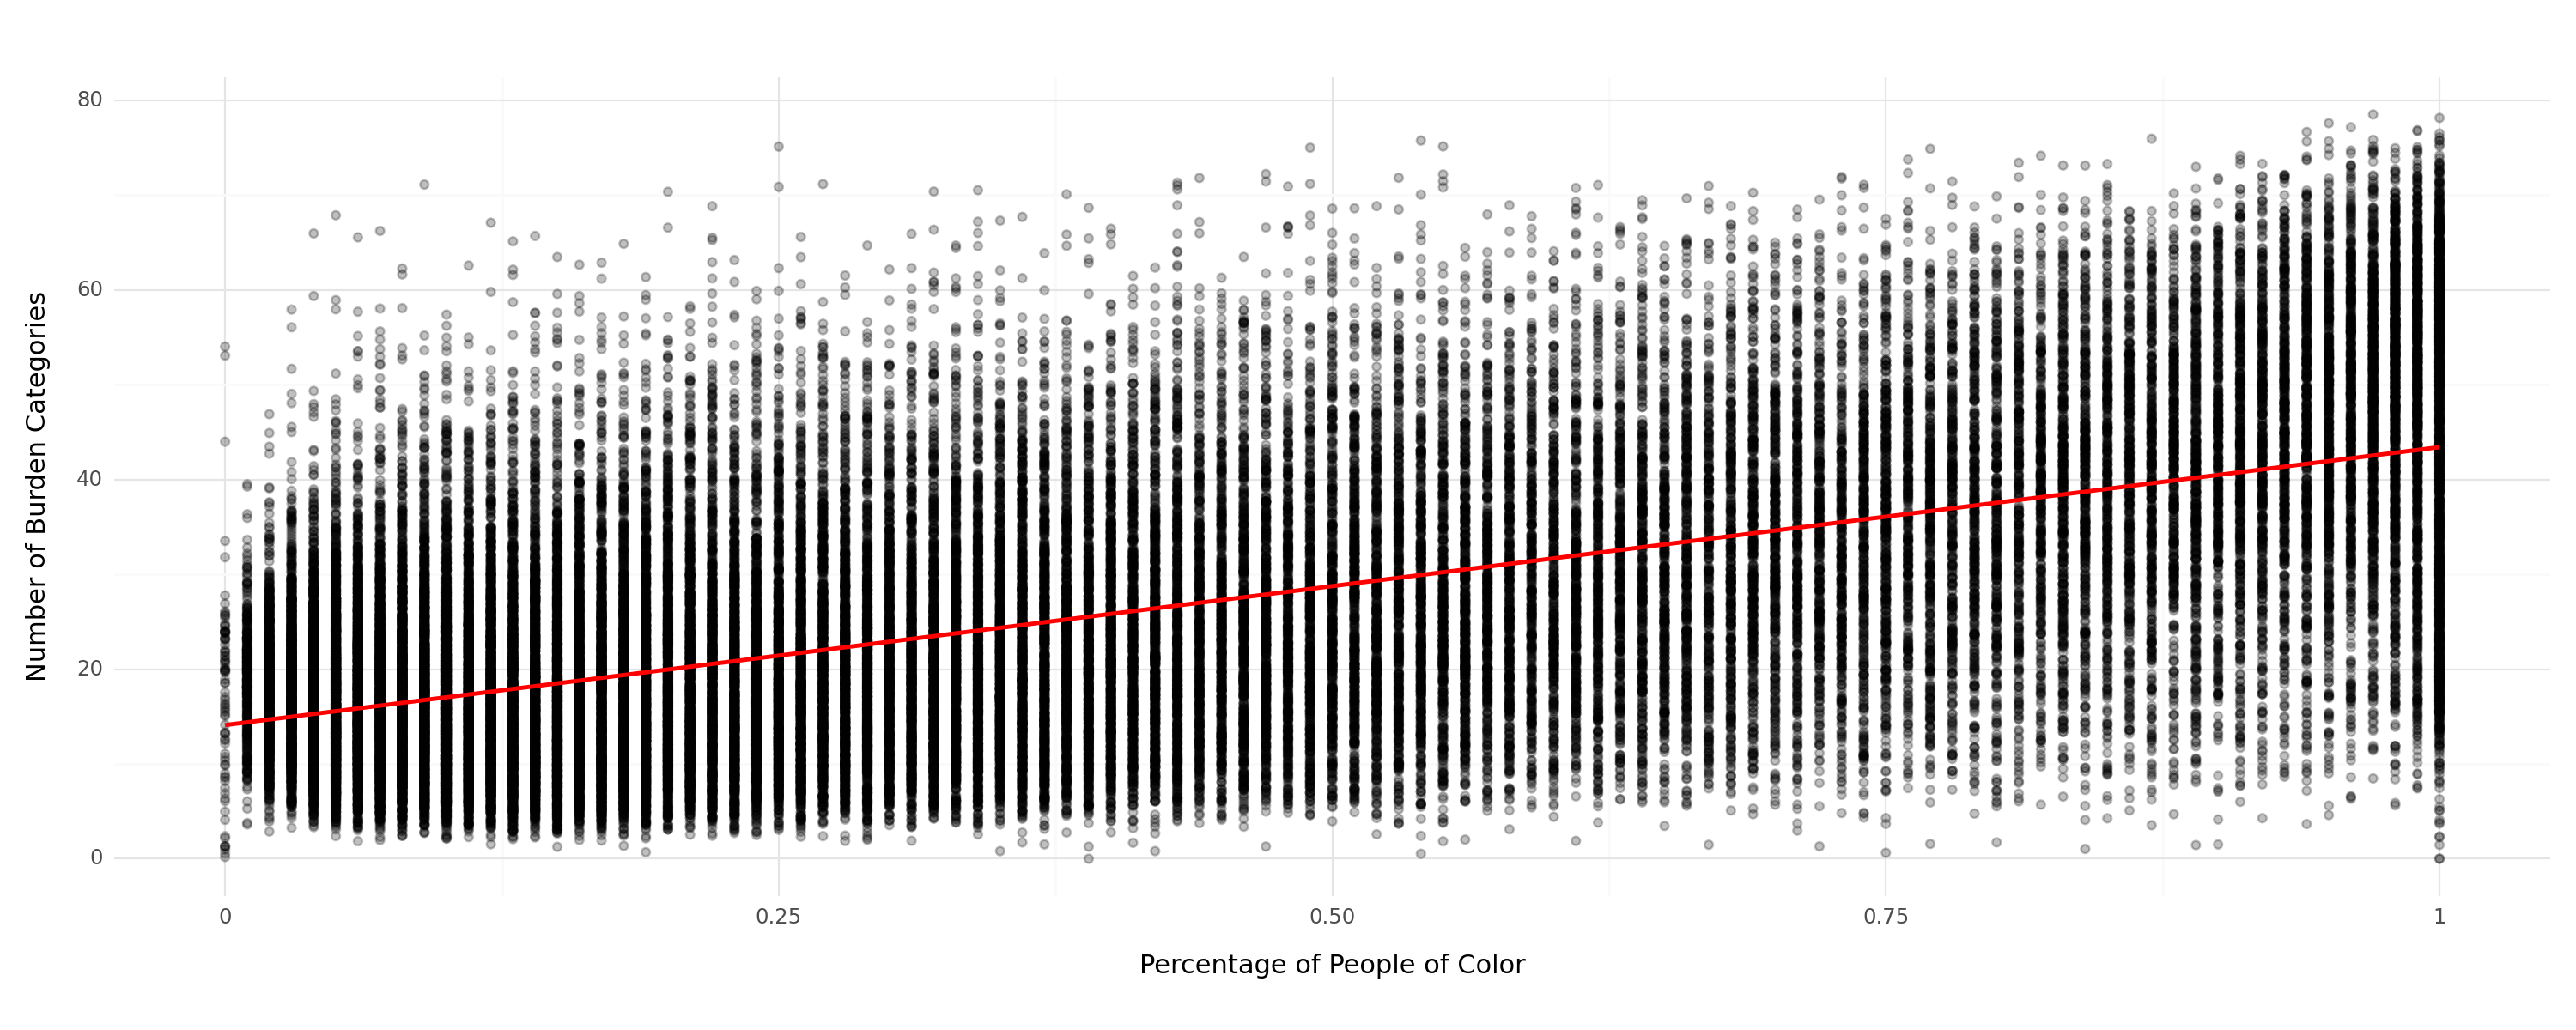

<Figure Size: (1500 x 600)>

In [98]:
# scatterplot and percentage of people of color
(
    ggplot(df_dem, aes(x='perc_poc', y='impact_score')) +
    geom_point(alpha=0.25) +
    geom_smooth(method='lm', color='red') +
    xlab('Percentage of People of Color') +
    ylab('Number of Burden Categories') +
    theme_minimal()
)

In [99]:
# calculate the correlation between those two (x and y) to quantify the strength
df_corr_index = df_dem[['perc_poc','impact_score']]

In [100]:
df_corr_test3 = df_corr_index.corr()

In [101]:
df_corr_test3.style.background_gradient(axis=None, cmap='coolwarm')

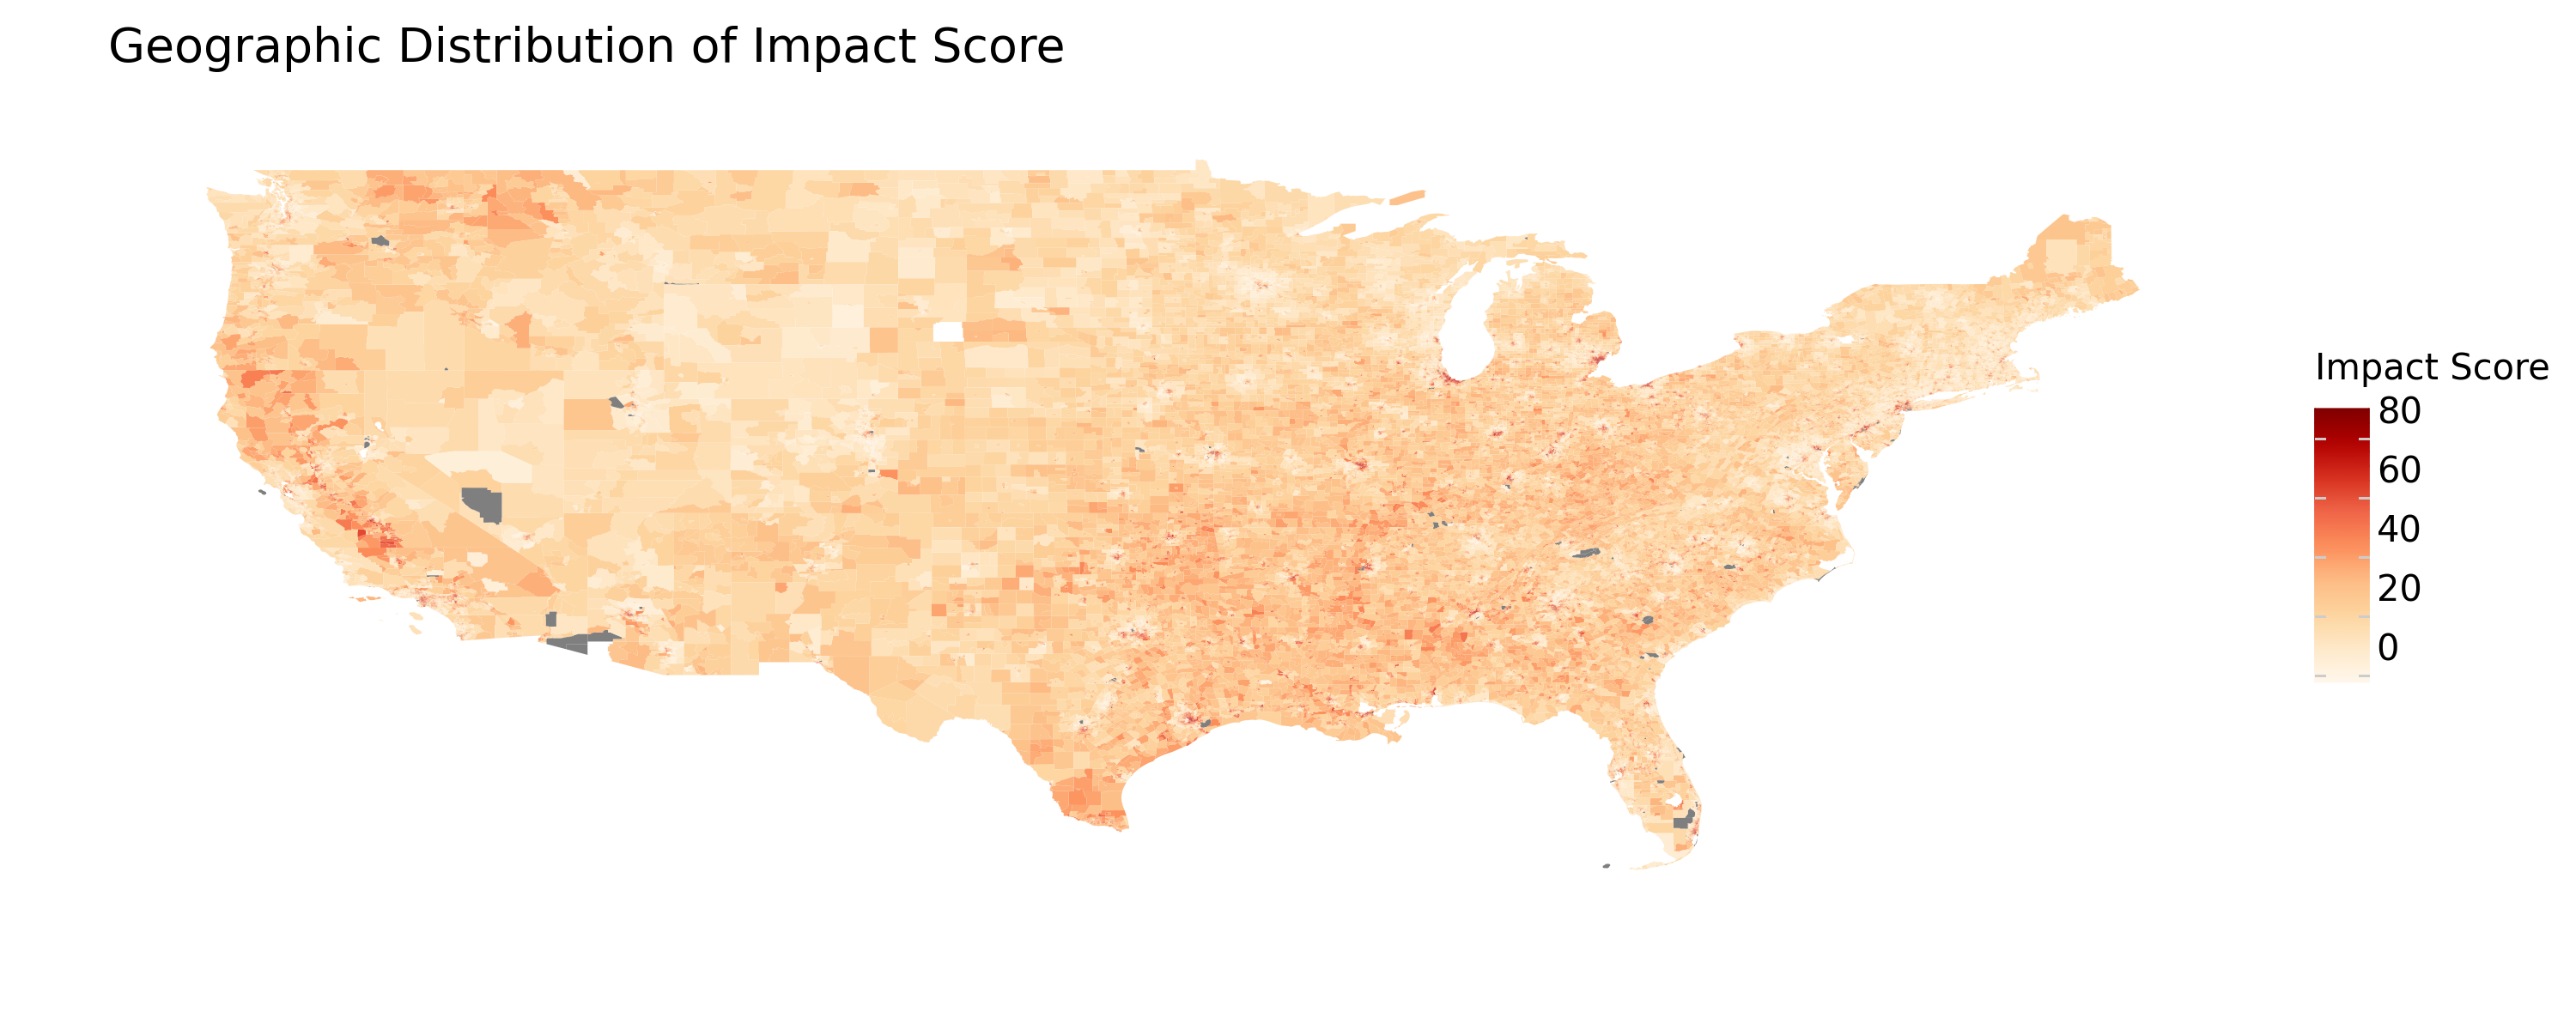

<Figure Size: (1500 x 600)>

In [103]:
# map according to index score
plotnine.options.figure_size = (15,6)
(
    ggplot() +
    geom_map(df_shape_cont, aes(geometry='geometry', fill='impact_score'), color=None, linetype='solid', size=0.2) +
    scale_fill_cmap(cmap_name='OrRd') +
    labs(fill='Impact Score', title='Geographic Distribution of Impact Score') +
    theme_classic() +
    theme(
        axis_line=element_line(color="white"),
        axis_ticks=element_line(color="white"),
        axis_text=element_text(color="white", size=15),
        text=element_text(size=15),
        plot_title=element_text(size=20)
    ) +
    xlab("") +
    ylab("")
)

# Step 5: Answer Research Questions

---

* How do the findings inform the project questions?

 ## Question 1
 * **Question 1**: Do the existing categories capture race without explicitly accounting for it?

* For our analysis, we:
  * A) Built a model to predict whether a census tract is burdened;
  * B) Developed a line of best fit comparing tract percentage of people of color with the number of categories; and
  * C) Created a correlation matrix to see which variables are correlated with race.

* An important caveat is that our model does not account for ethnicity, which could also be coorelated with environmental risk.
  * This may particularly impact people who are Hispanic or Latino, who's race may be inaccurately captured in census data.
  * A person may not idenitfy as White, but they may be considered White on the census.
  * The experience of these indivdiuals is not reflected in our analysis because we used "1 minus percent white" to calculate "percent POC."
  * For further analysis, it would be beneficial to understand how and whether ethnicity - particularly for Hispanic and Latino communities - is coorelated with environmental burden.


* In Part 1A, we created a "Percent POC" variable (percent non-white).
  * We then mapped the percentage of census tracts designated Disadvantaged according to percentage POC and conducted a logistic regression.
  * The results indicated a psuedo R-squared of 0.174, suggesting the model is not a very good fit.
  * With the exception of "Percent Native Hawaiian or Pacific Islander," each of the P-values are 0.0000, meaning each are considered statistically significant.

* In Part 1B, we were trying to compare tract percentage of people of color with the number of burden categories experienced.
  * We found that communities experiencing a higher number of categories of burden are heavily weighted towards being communities of color.


* In Part 1C, we used boolean variables to see how each variable is coorelated with race.
  * Our goal with this part of the analysis was to show whether the variables are implicitly accounting for race. Of all the variables, we found that just one apeared somewhat coorelated (.41) with "Percent POC" ("Greater than or equal to the 90th percentile for housing burden and is low income?").
  * When we further isolated for "Percent Black or African American alone," we found stronger coorelations between the variables than "Percent POC," but still only three that scored more than .40:
    * Greater than or equal to the 90th percentile for asthma and is low income?
    * Greater than or equal to the 90th percentile for diabetes and is low income?
    * Greater than or equal to the 90th percentile for low median household income as a percent of area median income and has low HS attainment?
  * If this analysis is correct, it finds that each of the indicators may not be coorelated with race.
  * We expected that more of the indicators would be coorelated with having higher percentages of POC, given the systemic barriers faced by many communities or color in the United States.
* With more time, we would do a deeper dive into each variable to understand how it relates to race.

## Question 2

* **Question 2**: Which communities are experiencing the highest burden?

* We used two methods to answer our second question.
  * First, we examined which communities met several of the eight categories of burden outlined in CEJST (see section 1 for the list of burdens).
    * This method will be referred to as "Categorical Analysis."
  * Second, we used the CalEnviroScreen methodology to provide a second means of understanding which communities are experiencing the highest environmental burden.
    * This method will be referred to as "Exposure Analysis."

* For the Categorical Analysis (Part 2A), we created a chloropleth map to visualize which tracts are "least burdened" to those that are "most burdened."
  * We only included in our analysis communities that met at least one category of burden (those that are considered Disadvantaged).
  * Through our analysis, we found communties experiencing highest burden in the Four Corners region (AZ, CO, NM & UT), Central Appalchia, the Dakotas, and South Texas.

* For the Exposure Analysis (Part 2B), our goal was to understand whether indexing environmental burden using CalEnviroScreen's methodology would produce similar results in terms of understanding which communities experience the highest burden.
  * Through weighting each indicator, rather than just looking at the number of categories fulfilled, we found a more nuanced picture of cumulative impacts across categories (though we did not account for cumulative impact across time).
  * In our second cloropleth map, we find that communities experiencing the highest "impact scores" are more dispersed across the contiguous U.S, and it is easier to see urban areas (ie New York, Los Angeles, Chicago) accounted for in red than in the Categorical map.

## Question 3

 * **Question 3**: Overall, is the screening tool effective given the initiative's goals?  

* The goal of CEJST was for the Biden Administration to instruct federal agencies as to how to allocate 40 percent of funding from some federal initiatives to Disadvantaged Communities.
* Because the administration used expansive indicators to define which communities are burdened, CEJST likely is an effective tool for increasing investment to disinvested communities.
* The investments may not particularly be targeted in communities of color.
* Rather than channeling funds to disadvantaged communities broadly, implementers could use similar analytic techniques to better target funding to communities that are most burdened.
* "Most burdened" could either mean burdened in a number of ways, or burdened over time, which would require time series data. This could be an interesting opportunity for future versions of CEJST.

## Further Analysis
* For question 1, we wish to better understand how ethnicity relates to environmental burden, which would require deeper coorelative and statstical analysis. The CEJST dataset doesn't preserve all racial and ethnic information captured in the census, so a proper analysis would use the census data directly.
* For question 2, we'd like to do a deeper dive into the data to determine if any further subcategories should be included, or if there are any that aren't meaningful and should be excluded. We didn't focus here, but it is necessary to understand if the categories included indeed translate to high environmental burden, or if some could be unnecesary and were perhaps included for political or other non-scientfic reasons.
* For question 3, our analysis provides useful insight for understanding where the Biden or other administrations could target investments to make them even more meaningful. It would be neat to analyze what other supportive policies could be applied to further assist the most burdened communities. It could be possible to have reduced beaucratic barriers for those who are most burdened, or to provide targeted support to apply for federal funds.
* Given time constraints, we focused our analysis on the continental U.S., but this disregards other crucial parts of the country that are accounted for in CEJST.

# Cut code

In [112]:
# create buckets of burdens (1, 2, 3-4, 5-7, 8)
# check category values in shapefile
# according to shapefile codebook, 'Total categories exceeded' is 'CC'
# df_shape_dem['CC'].unique()
# df_shape_map['burden_buckets'] = pd.cut(df_shape_dem['CC'], bins=[0.,1.,2.,4.,7.,9])
# df_shape_map['burden_buckets']
# double check bucketing aligns with original numbers
# df_shape_map['burden_buckets'].count()
# 26672 is consistent

In [109]:
# create a race boolean
# df_dem['Race data'] = np.where(
#    (df_dem['Percent Black or African American alone'] > 0) |
#    (df_dem['Percent American Indian / Alaska Native'] > 0) |
#    (df_dem['Percent Asian'] > 0) |
#    (df_dem['Percent Native Hawaiian or Pacific'] > 0) |
#    (df_dem['Percent two or more races'] > 0) |
#    (df_dem['Percent White'] > 0) |
#    (df_dem['Percent Hispanic or Latino'] > 0) |
#    (df_dem['Percent other races'] > 0),
#    1,
#    0)

In [110]:
# display all columns
# pd.set_option('display.max_columns', None)

In [111]:
# disable data table display for pandas dataframes
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

In [74]:
# county shapefiles from census
# links =['https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_01_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_02_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_04_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_05_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_06_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_08_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_09_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_10_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_11_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_12_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_13_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_15_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_16_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_17_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_18_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_19_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_20_pophu.zip',
#        'https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_21_pophu.zip',]